In [1]:
import get_NOAA
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Consulta de datos
### Inputs del código
 
 * Archivo csv con las coordendas, dichos datos deben estar en WGS84 (longitud | latitud).
 * Periodo en el cual se realizará la descarga.
 

In [2]:
## Coordenadas
sp_features = pd.read_csv("data/coordinates.csv")
print(sp_features.head())
sp_features = get_NOAA.organice_coordinates(sp_features)


   longitude  latitude
0    -75.233      2.32
1    -70.250      3.56
2      5.230     75.36


In [3]:
## consulta de información
noaa_data = get_NOAA.extract_NOAA_data_pergeom( '2017-01-01', '2017-08-31', sp_features)
noaa_data.head()

,Downward_Long-Wave_Radp_Flux_surface_6_Hour_Average,Downward_Short-Wave_Radiation_Flux_surface_6_Hour_Average,Maximum_temperature_height_above_ground_6_Hour_Interval,Minimum_temperature_height_above_ground_6_Hour_Interval,Precipitation_rate_surface_6_Hour_Average,Specific_humidity_height_above_ground,Upward_Long-Wave_Radp_Flux_surface_6_Hour_Average,Upward_Short-Wave_Radiation_Flux_surface_6_Hour_Average,date,longitude,latitude
0,353,0,285.29998779296875,282.5,8.399999933317304e-05,0.009548000060021877,370,0,2017010100,-75.233,2.32
1,400,0,295.5,294.70001220703125,9.999999974752427e-07,0.016535000875592232,428,0,2017010100,-70.250,3.56
2,254,0,271.20001220703125,271.1000061035156,2.2000000171829015e-05,0.0019049999536946416,335,0,2017010100,5.230,75.36
3,355,2,283.70001220703125,282.6000061035156,7.999999979801942e-06,0.008828000165522099,363,0,2017010106,-75.233,2.32
4,410,3,295.1000061035156,294.79998779296875,1.2000000424450263e-05,0.016450000926852226,428,0,2017010106,-70.250,3.56


In [4]:
## resumen de datos por fechas

## se pueden resumir por dias (days), mes - año (year_month) y año (year)
datasummarised = get_NOAA.summarise_noaa(noaa_data, by = "days", 
                        averagecolumns = ['Maximum_temperature_height_above_ground_6_Hour_Interval','Minimum_temperature_height_above_ground_6_Hour_Interval'])

datasummarised.head()

Downward_Long-Wave_Radp_Flux_surface_6_Hour_Average  \
dates      longitude latitude                                                        
2017-01-01 -75.233   2.32                                                 1459.0     
           -70.250   3.56                                                 1662.0     
            5.230    75.36                                                 964.0     
2017-01-02 -75.233   2.32                                                 1495.0     
           -70.250   3.56                                                 1606.0     

                               Downward_Short-Wave_Radiation_Flux_surface_6_Hour_Average  \
dates      longitude latitude                                                              
2017-01-01 -75.233   2.32                                                  463.0           
           -70.250   3.56                                                  186.0           
            5.230    75.36                                                   0.0           
2017-01-02 -75.233   2.32                                                  309.0           
           -70.250   3.56                                                  688.0           

                               Precipitation_rate_surface_6_Hour_Average  \
dates      longitude latitude                                              
2017-01-01 -75.233   2.32                                   2.240000e-04   
           -70.250   3.56                                   6.600000e-05   
            5.230    75.36                                  1.060000e-04   
2017-01-02 -75.233   2.32                                   3.610000e-04   
           -70.250   3.56                                   1.000000e-06   

                               Specific_humidity_height_above_ground  \
dates      longitude latitude                                          
2017-01-01 -75.233   2.32                                   0.044029   
           -70.250   3.56                                   0.066212   
            5.230    75.36                                  0.007258   
2017-01-02 -75.233   2.32                                   0.043323   
           -70.250   3.56                                   0.063539   

                               Upward_Long-Wave_Radp_Flux_surface_6_Hour_Average  \
dates      longitude latitude                                                      
2017-01-01 -75.233   2.32                                                 1539.0   
           -70.250   3.56                                                 1726.0   
            5.230    75.36                                                1336.0   
2017-01-02 -75.233   2.32                                                 1552.0   
           -70.250   3.56                                                 1742.0   

                               Upward_Short-Wave_Radiation_Flux_surface_6_Hour_Average  \
dates      longitude latitude                                                            
2017-01-01 -75.233   2.32                                                   57.0         
           -70.250   3.56                                                   30.0         
            5.230    75.36                                                   0.0         
2017-01-02 -75.233   2.32                                                   37.0         
           -70.250   3.56                                                  113.0         

                               Maximum_temperature_height_above_ground_6_Hour_Interval  \
dates      longitude latitude                                                            
2017-01-01 -75.233   2.32                                             288.974998         
           -70.250   3.56                                             295.900002         
            5.230    75.36                                            270.675003         
2017-01-02 -75.233   2.32                                             289.4

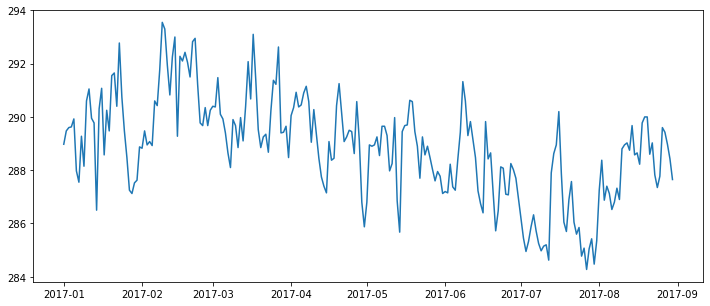

In [17]:
### gr'afica para una coordenada

datatoplot = datasummarised[np.in1d(datasummarised.index.get_level_values(2), [2.32])]
plt.figure(figsize=[12,5])
plt.plot(datatoplot.index.get_level_values(0), datatoplot['Maximum_temperature_height_above_ground_6_Hour_Interval'])
plt.show()

In [18]:
### exportar dato
os.mkdir("results")
datasummarised.to_csv(os.path.join("results","noaadata.csv"))